In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#list of df's
df_names = []


#Below I create the DF

In [ ]:
#Creating DF using Crude oil prices

crude_url = "https://raw.githubusercontent.com/ajohn432/AML-Project/refs/heads/main/Crude%20oil.csv"

crude_oil_df = pd.read_csv(crude_url)

crude_oil_df = crude_oil_df.iloc[:,:2]

crude_oil_df = crude_oil_df.iloc[2:].reset_index(drop=True)

crude_oil_df.columns = ['Date', 'Crude_Price']

crude_oil_df['Date'] = pd.to_datetime(crude_oil_df['Date'], format='%b-%Y')

start_date = '2001-01-01'
end_date = '2018-10-31'

crude_oil_df = crude_oil_df[(crude_oil_df['Date'] >= start_date) & (crude_oil_df['Date'] <= end_date)]

crude_oil_df = crude_oil_df.reset_index(drop=True)

print(crude_oil_df)

df_names.append(crude_oil_df)

          Date Crude_Price
0   2001-01-01       29.59
1   2001-02-01       29.61
2   2001-03-01       27.25
3   2001-04-01       27.49
4   2001-05-01       28.63
..         ...         ...
209 2018-06-01       67.87
210 2018-07-01       70.98
211 2018-08-01       68.06
212 2018-09-01       70.23
213 2018-10-01       70.75

[214 rows x 2 columns]


In [ ]:
#Creating Heating oil df

heating_oil_url = "https://raw.githubusercontent.com/ajohn432/AML-Project/refs/heads/main/Heating%20Oil.csv"

heating_oil_df = pd.read_csv(heating_oil_url)

heating_oil_df = heating_oil_df.iloc[:,:2]

heating_oil_df = heating_oil_df.iloc[2:].reset_index(drop=True)

heating_oil_df.columns = ['Date', 'Heating_Oil_Price']

heating_oil_df['Date'] = pd.to_datetime(heating_oil_df['Date'], format='%b-%Y')

heating_oil_df = heating_oil_df[(heating_oil_df['Date'] >= start_date) & (heating_oil_df['Date'] <= end_date)]

heating_oil_df = heating_oil_df.reset_index(drop=True)

print(heating_oil_df)

df_names.append(heating_oil_df)

          Date Heating_Oil_Price
0   2001-01-01             0.845
1   2001-02-01             0.785
2   2001-03-01             0.741
3   2001-04-01             0.782
4   2001-05-01             0.772
..         ...               ...
209 2018-06-01             2.112
210 2018-07-01             2.108
211 2018-08-01             2.125
212 2018-09-01             2.225
213 2018-10-01             2.313

[214 rows x 2 columns]


In [ ]:
#Creating Natural Gas Spot price df

natural_gas_url = "https://raw.githubusercontent.com/ajohn432/AML-Project/refs/heads/main/Henry_Hub_Natural_Gas_Spot_Price.csv"

natural_gas_df = pd.read_csv(natural_gas_url, skiprows=4)

natural_gas_df.columns = ['Date', 'Natural_Gas_Price']

natural_gas_df['Date'] = pd.to_datetime(natural_gas_df['Date'], format='%b %Y')

natural_gas_df = natural_gas_df[(natural_gas_df['Date'] >= start_date) & (natural_gas_df['Date'] <= end_date)]

natural_gas_df = natural_gas_df.reset_index(drop=True)

print(natural_gas_df.head())
print(natural_gas_df.tail())
print(natural_gas_df)

df_names.append(natural_gas_df)

        Date  Natural_Gas_Price
0 2018-10-01               3.28
1 2018-09-01               3.00
2 2018-08-01               2.96
3 2018-07-01               2.83
4 2018-06-01               2.97
          Date  Natural_Gas_Price
209 2001-05-01               4.19
210 2001-04-01               5.19
211 2001-03-01               5.23
212 2001-02-01               5.61
213 2001-01-01               8.17
          Date  Natural_Gas_Price
0   2018-10-01               3.28
1   2018-09-01               3.00
2   2018-08-01               2.96
3   2018-07-01               2.83
4   2018-06-01               2.97
..         ...                ...
209 2001-05-01               4.19
210 2001-04-01               5.19
211 2001-03-01               5.23
212 2001-02-01               5.61
213 2001-01-01               8.17

[214 rows x 2 columns]


In [ ]:
#Natural gas imports csv loading and df

ng_imports_url = "https://raw.githubusercontent.com/ajohn432/AML-Project/refs/heads/main/NG%20Imports.csv"

ng_imports_df = pd.read_csv(ng_imports_url, skiprows=2)

ng_imports_df = ng_imports_df[['Date', 'U.S. Natural Gas Imports (MMcf)']]

ng_imports_df.columns = ['Date', 'Total_Imports']

ng_imports_df['Date'] = pd.to_datetime(ng_imports_df['Date'], format='%b-%Y')

ng_imports_df = ng_imports_df[(ng_imports_df['Date'] >= start_date) & (ng_imports_df['Date'] <= end_date)]

ng_imports_df = ng_imports_df.reset_index(drop=True)

print(ng_imports_df)

df_names.append(ng_imports_df)

          Date  Total_Imports
0   2001-01-01         373077
1   2001-02-01         328289
2   2001-03-01         358103
3   2001-04-01         318573
4   2001-05-01         321878
..         ...            ...
209 2018-06-01         228469
210 2018-07-01         247012
211 2018-08-01         237025
212 2018-09-01         214074
213 2018-10-01         215128

[214 rows x 2 columns]


In [ ]:
#Natural gas storage csv loading and df

ng_storage_url = "https://raw.githubusercontent.com/ajohn432/AML-Project/refs/heads/main/NG%20Underground%20storage%20volume.csv"

ng_storage_df = pd.read_csv(ng_storage_url, skiprows=2)

ng_storage_df = ng_storage_df[['Date', 'U.S. Natural Gas Underground Storage Volume (MMcf)']]

ng_storage_df.columns = ['Date', 'Total_Storage']

ng_storage_df['Date'] = pd.to_datetime(ng_storage_df['Date'], format='%b-%Y')

ng_storage_df = ng_storage_df[(ng_storage_df['Date'] >= start_date) & (ng_storage_df['Date'] <= end_date)]

ng_storage_df = ng_storage_df.reset_index(drop=True)

print(ng_storage_df)

df_names.append(ng_storage_df)

          Date  Total_Storage
0   2001-01-01      5609446.0
1   2001-02-01      5240820.0
2   2001-03-01      5041971.0
3   2001-04-01      5252851.0
4   2001-05-01      5749464.0
..         ...            ...
209 2018-06-01      6549065.0
210 2018-07-01      6735506.0
211 2018-08-01      6971846.0
212 2018-09-01      7306139.0
213 2018-10-01      7592871.0

[214 rows x 2 columns]


In [ ]:
#Natural gas imports csv loading and df

ng_consumption_url = "https://raw.githubusercontent.com/ajohn432/AML-Project/refs/heads/main/Natural_Gas_Consumption.csv"

ng_consumption_df = pd.read_csv(ng_consumption_url, skiprows=2)

ng_consumption_df = ng_consumption_df[['Date', 'U.S. Natural Gas Total Consumption (MMcf)']]

ng_consumption_df.columns = ['Date', 'Total_Consumption']

ng_consumption_df['Date'] = pd.to_datetime(ng_consumption_df['Date'], format='%b-%Y')

ng_consumption_df = ng_consumption_df[(ng_consumption_df['Date'] >= start_date) & (ng_consumption_df['Date'] <= end_date)]

ng_consumption_df = ng_consumption_df.reset_index(drop=True)

print(ng_consumption_df)

df_names.append(ng_consumption_df)


          Date  Total_Consumption
0   2001-01-01          2676998.0
1   2001-02-01          2309464.0
2   2001-03-01          2246633.0
3   2001-04-01          1807170.0
4   2001-05-01          1522382.0
..         ...                ...
209 2018-06-01          2063144.0
210 2018-07-01          2350719.0
211 2018-08-01          2313836.0
212 2018-09-01          2156063.0
213 2018-10-01          2285854.0

[214 rows x 2 columns]


In [ ]:
#Natural gas imports csv loading and df

ng_production_url = "https://raw.githubusercontent.com/ajohn432/AML-Project/refs/heads/main/Natural_gas_marked_production.csv"

ng_production_df = pd.read_csv(ng_production_url, skiprows=2)

ng_production_df = ng_production_df[['Date', 'U.S. Natural Gas Marketed Production (MMcf)']]

ng_production_df.columns = ['Date', 'Total_Production']

ng_production_df['Date'] = pd.to_datetime(ng_production_df['Date'], format='%b-%Y')

ng_production_df = ng_production_df[(ng_production_df['Date'] >= start_date) & (ng_production_df['Date'] <= end_date)]

ng_production_df = ng_production_df.reset_index(drop=True)

print(ng_production_df)

df_names.append(ng_production_df)

          Date  Total_Production
0   2001-01-01           1753237
1   2001-02-01           1582557
2   2001-03-01           1766754
3   2001-04-01           1703310
4   2001-05-01           1763141
..         ...               ...
209 2018-06-01           2655954
210 2018-07-01           2799146
211 2018-08-01           2855600
212 2018-09-01           2808817
213 2018-10-01           2939250

[214 rows x 2 columns]


In [ ]:
df_names

[          Date Crude_Price
 0   2001-01-01       29.59
 1   2001-02-01       29.61
 2   2001-03-01       27.25
 3   2001-04-01       27.49
 4   2001-05-01       28.63
 ..         ...         ...
 209 2018-06-01       67.87
 210 2018-07-01       70.98
 211 2018-08-01       68.06
 212 2018-09-01       70.23
 213 2018-10-01       70.75
 
 [214 rows x 2 columns],
           Date Heating_Oil_Price
 0   2001-01-01             0.845
 1   2001-02-01             0.785
 2   2001-03-01             0.741
 3   2001-04-01             0.782
 4   2001-05-01             0.772
 ..         ...               ...
 209 2018-06-01             2.112
 210 2018-07-01             2.108
 211 2018-08-01             2.125
 212 2018-09-01             2.225
 213 2018-10-01             2.313
 
 [214 rows x 2 columns],
           Date  Natural_Gas_Price
 0   2018-10-01               3.28
 1   2018-09-01               3.00
 2   2018-08-01               2.96
 3   2018-07-01               2.83
 4   2018-06-01            

In [ ]:
combined_df = df_names[0]
for df in df_names[1:]:
  combined_df = pd.merge(combined_df, df, on='Date', how='inner')

In [ ]:
combined_df

,Date,Crude_Price,Heating_Oil_Price,Natural_Gas_Price,Total_Imports,Total_Storage,Total_Consumption,Total_Production
0,2001-01-01,29.59,0.845,8.17,373077,5609446.0,2676998.0,1753237
1,2001-02-01,29.61,0.785,5.61,328289,5240820.0,2309464.0,1582557
2,2001-03-01,27.25,0.741,5.23,358103,5041971.0,2246633.0,1766754
3,2001-04-01,27.49,0.782,5.19,318573,5252851.0,1807170.0,1703310
4,2001-05-01,28.63,0.772,4.19,321878,5749464.0,1522382.0,1763141
...,...,...,...,...,...,...,...,...
209,2018-06-01,67.87,2.112,2.97,228469,6549065.0,2063144.0,2655954
210,2018-07-01,70.98,2.108,2.83,247012,6735506.0,2350719.0,2799146
211,2018-08-01,68.06,2.125,2.96,237025,6971846.0,2313836.0,2855600
212,2018-09-01,70.23,2.225,3.00,214074,7306139.0,2156063.0,2808817


In [ ]:
#Checking for NaNs

print(combined_df.isna().sum())

print(combined_df.isna().any().any())

Date                 0
Crude_Price          0
Heating_Oil_Price    0
Natural_Gas_Price    0
Total_Imports        0
Total_Storage        0
Total_Consumption    0
Total_Production     0
dtype: int64
False


In [ ]:
#Variable correlation table
correlation_matrix = combined_df.corr()
print(correlation_matrix)


                       Date  Crude_Price  Heating_Oil_Price  \
Date               1.000000     0.406030           0.474214   
Crude_Price        0.406030     1.000000           0.980507   
Heating_Oil_Price  0.474214     0.980507           1.000000   
Natural_Gas_Price -0.465057     0.196367           0.132059   
Total_Imports     -0.769398    -0.264619          -0.331490   
Total_Storage      0.353083     0.134066           0.161790   
Total_Consumption  0.384902     0.023717           0.095752   
Total_Production   0.910791     0.196345           0.280099   

                   Natural_Gas_Price  Total_Imports  Total_Storage  \
Date                       -0.465057      -0.769398       0.353083   
Crude_Price                 0.196367      -0.264619       0.134066   
Heating_Oil_Price           0.132059      -0.331490       0.161790   
Natural_Gas_Price           1.000000       0.608860      -0.309910   
Total_Imports               0.608860       1.000000      -0.294256   
Total_Storag

# *Glorious Pipeline/pre actual model stuff*

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process.kernels import RBF

pipelines = {
    'SVR': Pipeline([
        ('sc', StandardScaler()),
        ('model', SVR(kernel='poly', degree=3, C=1.0))
    ]),
    'GradientBoosting': Pipeline([
        ('sc', StandardScaler()),
        ('model', GradientBoostingRegressor(n_estimators=200, loss='squared_error'))
    ]),
    'GaussianProcess': Pipeline([
        ('sc', StandardScaler()),
        ('model', GaussianProcessRegressor(kernel=RBF(), alpha=1e-10))
    ]),
    'ANN': Pipeline([
        ('sc', StandardScaler()),
        ('model', MLPRegressor(hidden_layer_sizes=(10,), solver='lbfgs'))
    ])
}

#I plan on adding more here later

# Preparing Training/Tesing Data + Training the Models

In [ ]:
X = combined_df.drop(columns=['Date', 'Natural_Gas_Price'])

y = combined_df['Natural_Gas_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

empirical_study = []
#Training the models
for name, pipeline in pipelines.items():
  #train the models
  pipeline.fit(X_train, y_train)
  #predict based on the models
  y_pred = pipeline.predict(X_test)

  #do the empirical metrics
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  #Store the results of each model in a table
  empirical_study.append({
      'Model': name,
      'R2': r2,
      'MAE': mae,
      'MSE': mse,
      'RMSE': rmse,
      'MAPE': mape
  })

#Convert results to pd df so i can display them
empirical_study_df = pd.DataFrame(empirical_study)




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print(empirical_study_df)


              Model        R2       MAE       MSE      RMSE       MAPE
0               SVR  0.699129  1.008719  1.772110  1.331206  25.015134
1  GradientBoosting  0.792397  0.674229  1.222765  1.105787  14.136312
2   GaussianProcess  0.363762  1.265678  3.747399  1.935820  24.635711
3               ANN  0.780643  0.832396  1.291997  1.136660  19.130442


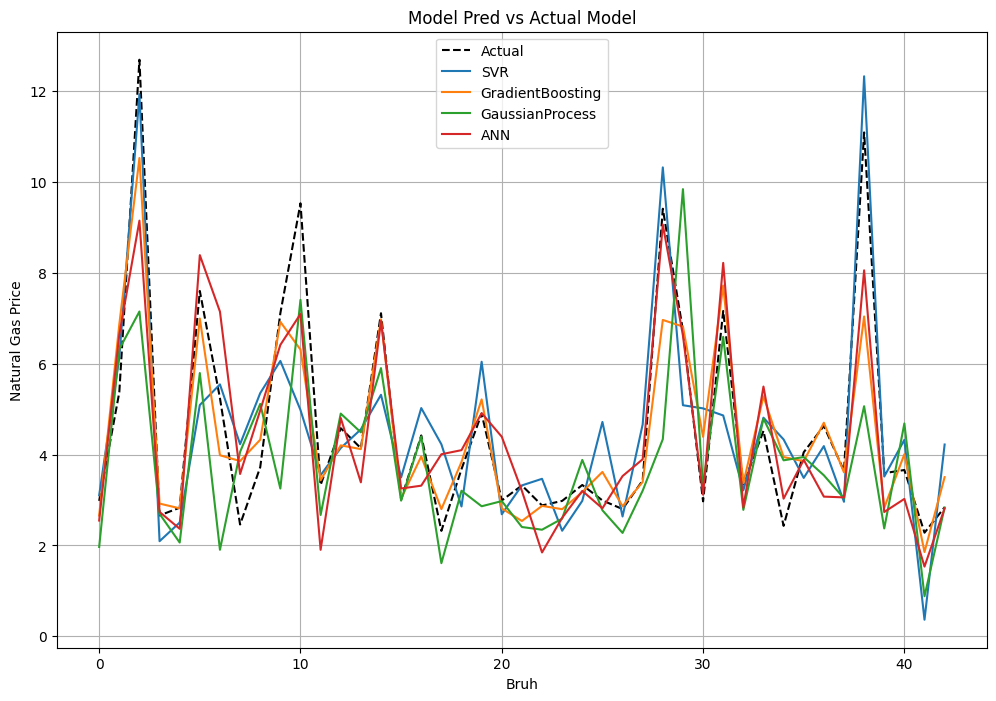

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(y_test.reset_index(drop=True), label='Actual', color='black', linestyle='--')
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    plt.plot(y_pred, label=name)
plt.title('Model Pred vs Actual Model')
plt.xlabel('Bruh')
plt.ylabel('Natural Gas Price')
plt.legend()
plt.grid(True)
plt.show()